# Creating Loss Graphs for Experiments

This notebook creates a loss graph of a specified experiment and saves the graph in the experiment directory

In [230]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os

In [231]:
# function to read the loss record
def read_dict_file(filename):
    with open(filename, 'r') as file:
        # Read each line and convert it to a dictionary using eval
        list_of_dicts = [eval(line.strip()) for line in file]
    df = pd.DataFrame.from_dict(list_of_dicts)
    return df

In [242]:
# use this cell to specify the crop scale and experiment name for visualization

crop = 800
experiment_name = f'detr_output_800_binary_skip'

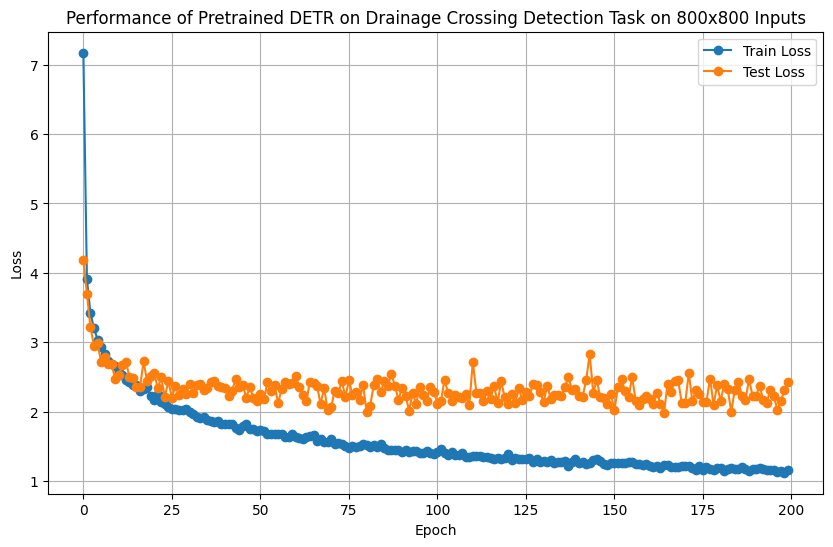

In [243]:
# generating and saving the loss graph

savedir = os.path.join('/workspace', experiment_name)
filename = os.path.join('/workspace', experiment_name, 'log.txt')
df = read_dict_file(filename)

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train_loss'], label='Train Loss', marker='o')
plt.plot(df['epoch'], df['test_loss'], label='Test Loss', marker='o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Performance of Pretrained DETR on Drainage Crossing Detection Task on {crop}x{crop} Inputs')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(savedir, 'training_graph.png'))